In [1]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [3]:
stocks = ['AMZN']
start = '1997-05-16'
end = '2023-09-25'
df = pdr.get_data_yahoo(stocks, start, end)
df = df.drop(columns=['Open','High','Low','Close','Volume'])
df.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
1997-05-22,0.069792


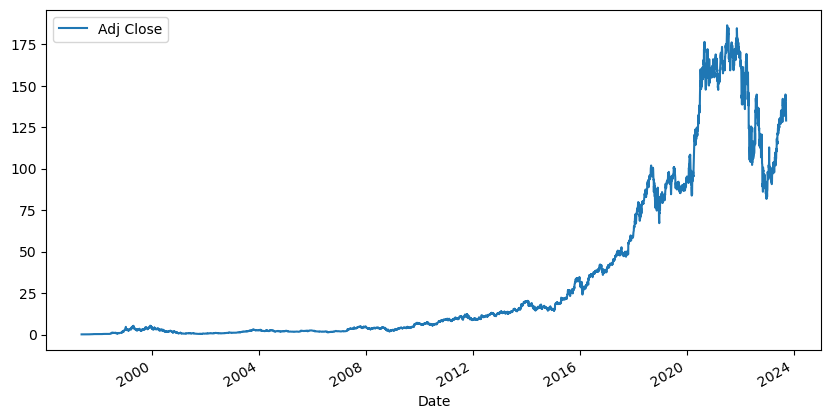

In [18]:
df['Adj Close'].plot(figsize=(10,5))
plt.legend(loc='upper left')
plt.show()

In [19]:
forecast = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast)
df.head()

,Adj Close,Prediction
Date,,
1997-05-16,0.086458,0.077083
1997-05-19,0.085417,0.075781
1997-05-20,0.081771,0.079427
1997-05-21,0.071354,0.095573
1997-05-22,0.069792,0.100000


In [77]:
X = np.vstack(np.array(df['Adj Close']))
X = preprocessing.scale(X)


X_forecast = X[-forecast:]
# drop the nan days
X = X[:-forecast]

y = np.vstack(np.array(df['Prediction']))
# keep up with X
y = y[:-forecast]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted[:5])

[[139.20829496]
 [141.37225869]
 [138.46693277]
 [135.8621752 ]
 [134.77016522]]


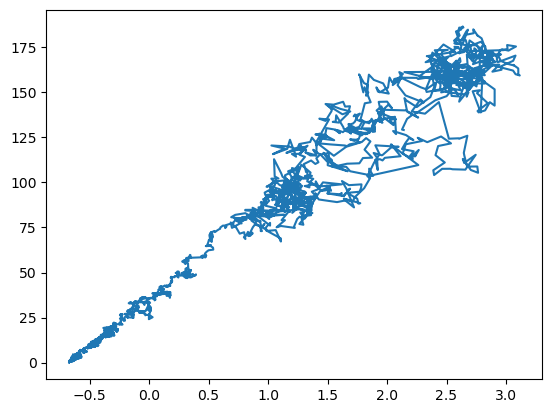

In [81]:
plt.plot(X,y)

In [47]:
plt.plot(forecast_predicted,y)

(3301, 3301)

In [76]:
np.vstack(np.array(df['Adj Close']))

array([[8.64579976e-02],
       [8.54170024e-02],
       [8.17710012e-02],
       ...,
       [1.35289993e+02],
       [1.29330002e+02],
       [1.29119995e+02]])

In [72]:
np.array(df.drop(columns=['Prediction']))

array([[8.64579976e-02],
       [8.54170024e-02],
       [8.17710012e-02],
       ...,
       [1.35289993e+02],
       [1.29330002e+02],
       [1.29119995e+02]])